In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


- Importing the data

In [173]:
honda_parts= pd.read_csv('honda_parts_data.csv')
# Display the first few rows of the dataset

honda_parts.head()

,assessment_id,vehicle_make,vehicle make,vehicle_model,vehicle model,model_code,model code,part/service,category_id,category,...,fix type,damage_id,damage,estimated_repair_days,for_painting,paint_type,paint type,panels_to_paint,unit_price (vat incl. 16%),date
0,56,24,Honda,246,CR-V,5346,DBA-RM4,1683,1,Body,...,replace,1,Scratched,4,no,-,-,NaN,NaN,10/23/2023 8:36
1,56,24,Honda,246,CR-V,5346,DBA-RM4,1311,1,Body,...,repair,11,Broken,4,no,-,-,NaN,9280.0,10/23/2023 8:36
2,56,24,Honda,246,CR-V,5346,DBA-RM4,48,1,Body,...,replace,1,Scratched,4,yes,1,Metallic,4.0,NaN,10/23/2023 8:36
3,56,24,Honda,246,CR-V,5346,DBA-RM4,99,1,Body,...,repair,4,Buckled,4,yes,1,Metallic,4.0,139200.0,10/23/2023 8:36
4,56,24,Honda,246,CR-V,5346,DBA-RM4,1151,1,Body,...,repair,9,Bent,4,no,-,-,NaN,5800.0,10/23/2023 8:36


- Inspecting the data

In [174]:
honda_parts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   assessment_id               435 non-null    int64  
 1   vehicle_make                435 non-null    int64  
 2   vehicle make                435 non-null    object 
 3   vehicle_model               435 non-null    int64  
 4   vehicle model               435 non-null    object 
 5   model_code                  435 non-null    int64  
 6   model code                  435 non-null    object 
 7   part/service                435 non-null    int64  
 8   category_id                 435 non-null    int64  
 9   category                    435 non-null    object 
 10  part or service             435 non-null    object 
 11  service_provider            425 non-null    float64
 12  part_condition              435 non-null    int64  
 13  part condition              435 non

In [175]:
honda_parts.columns

Index(['assessment_id', 'vehicle_make', 'vehicle make', 'vehicle_model',
       'vehicle model', 'model_code', 'model code', 'part/service',
       'category_id', 'category', 'part or service', 'service_provider',
       'part_condition', 'part condition', 'part_type', 'part type',
       'quantity', 'fix_type', 'fix type', 'damage_id', 'damage',
       'estimated_repair_days', 'for_painting', 'paint_type', 'paint type',
       'panels_to_paint', 'unit_price (vat incl. 16%)', 'date'],
      dtype='object')

In [176]:
honda_parts.isnull().sum()  

assessment_id                   0
vehicle_make                    0
vehicle make                    0
vehicle_model                   0
vehicle model                   0
model_code                      0
model code                      0
part/service                    0
category_id                     0
category                        0
part or service                 0
service_provider               10
part_condition                  0
part condition                  0
part_type                       0
part type                       0
quantity                        0
fix_type                        0
fix type                        0
damage_id                       0
damage                          0
estimated_repair_days           0
for_painting                    0
paint_type                      0
paint type                      0
panels_to_paint               315
unit_price (vat incl. 16%)     77
date                            0
dtype: int64

In [177]:
#assigning the DataFrame to a new variable
clean_df = honda_parts
clean_df.head()

,assessment_id,vehicle_make,vehicle make,vehicle_model,vehicle model,model_code,model code,part/service,category_id,category,...,fix type,damage_id,damage,estimated_repair_days,for_painting,paint_type,paint type,panels_to_paint,unit_price (vat incl. 16%),date
0,56,24,Honda,246,CR-V,5346,DBA-RM4,1683,1,Body,...,replace,1,Scratched,4,no,-,-,NaN,NaN,10/23/2023 8:36
1,56,24,Honda,246,CR-V,5346,DBA-RM4,1311,1,Body,...,repair,11,Broken,4,no,-,-,NaN,9280.0,10/23/2023 8:36
2,56,24,Honda,246,CR-V,5346,DBA-RM4,48,1,Body,...,replace,1,Scratched,4,yes,1,Metallic,4.0,NaN,10/23/2023 8:36
3,56,24,Honda,246,CR-V,5346,DBA-RM4,99,1,Body,...,repair,4,Buckled,4,yes,1,Metallic,4.0,139200.0,10/23/2023 8:36
4,56,24,Honda,246,CR-V,5346,DBA-RM4,1151,1,Body,...,repair,9,Bent,4,no,-,-,NaN,5800.0,10/23/2023 8:36


#Renaming columns

In [178]:
clean_df.columns.values[1] = 'Vehicle_make_id'
clean_df.columns.values[3] = 'Vehicle_model_id'
clean_df.columns.values[5] = 'model_code_id'
clean_df.columns.values[7] = 'part/service_id'
clean_df.columns.values[11] = 'pervice_provider_id'
clean_df.columns.values[12] = 'part_condition_id'
clean_df.columns.values[14] = 'part_type_id'
clean_df.columns.values[17] = 'fix_type_id'
clean_df.columns.values[23] = 'paint_type_id'


- Viewing the  changes made

In [179]:
clean_df.head()

,assessment_id,Vehicle_make_id,vehicle make,Vehicle_model_id,vehicle model,model_code_id,model code,part/service_id,category_id,category,...,fix type,damage_id,damage,estimated_repair_days,for_painting,paint_type_id,paint type,panels_to_paint,unit_price (vat incl. 16%),date
0,56,24,Honda,246,CR-V,5346,DBA-RM4,1683,1,Body,...,replace,1,Scratched,4,no,-,-,NaN,NaN,10/23/2023 8:36
1,56,24,Honda,246,CR-V,5346,DBA-RM4,1311,1,Body,...,repair,11,Broken,4,no,-,-,NaN,9280.0,10/23/2023 8:36
2,56,24,Honda,246,CR-V,5346,DBA-RM4,48,1,Body,...,replace,1,Scratched,4,yes,1,Metallic,4.0,NaN,10/23/2023 8:36
3,56,24,Honda,246,CR-V,5346,DBA-RM4,99,1,Body,...,repair,4,Buckled,4,yes,1,Metallic,4.0,139200.0,10/23/2023 8:36
4,56,24,Honda,246,CR-V,5346,DBA-RM4,1151,1,Body,...,repair,9,Bent,4,no,-,-,NaN,5800.0,10/23/2023 8:36


In [180]:
# Remove leading/trailing whitespace from all column names
clean_df.columns = clean_df.columns.str.strip()

In [181]:
clean_df.dtypes

assessment_id                   int64
Vehicle_make_id                 int64
vehicle make                   object
Vehicle_model_id                int64
vehicle model                  object
model_code_id                   int64
model code                     object
part/service_id                 int64
category_id                     int64
category                       object
part or service                object
pervice_provider_id           float64
part_condition_id               int64
part condition                 object
part_type_id                   object
part type                      object
quantity                        int64
fix_type_id                    object
fix type                       object
damage_id                      object
damage                         object
estimated_repair_days           int64
for_painting                   object
paint_type_id                  object
paint type                     object
panels_to_paint               float64
unit_price (

In [182]:
#converting th id's to strings
clean_df['Vehicle_make_id'] = clean_df['Vehicle_make_id'].astype('string')
clean_df['Vehicle_model_id'] = clean_df['Vehicle_model_id'].astype('string')
clean_df['model_code_id'] = clean_df['model_code_id'].astype('string')
clean_df['part/service_id'] = clean_df['part/service_id'].astype('string')
clean_df['pervice_provider_id'] = clean_df['pervice_provider_id'].astype('string')
clean_df['part_condition_id'] = clean_df['part_condition_id'].astype('string')
clean_df['part_type_id'] = clean_df['part_type_id'].astype('string')
clean_df['fix_type_id'] = clean_df['fix_type_id'].astype('string')
clean_df['paint_type_id'] = clean_df['paint_type_id'].astype('string')
clean_df['damage_id'] = clean_df['damage_id'].astype('string')
clean_df['category_id'] = clean_df['category_id'].astype('string')


In [183]:
clean_df.dtypes

assessment_id                          int64
Vehicle_make_id               string[python]
vehicle make                          object
Vehicle_model_id              string[python]
vehicle model                         object
model_code_id                 string[python]
model code                            object
part/service_id               string[python]
category_id                   string[python]
category                              object
part or service                       object
pervice_provider_id           string[python]
part_condition_id             string[python]
part condition                        object
part_type_id                  string[python]
part type                             object
quantity                               int64
fix_type_id                   string[python]
fix type                              object
damage_id                     string[python]
damage                                object
estimated_repair_days                  int64
for_painti

In [184]:
#changing the data type of the date columns to datetime
clean_df['date'] = pd.to_datetime(clean_df['date'])

- We drop the Vehicle make column as it has just one distinct value

In [185]:
#dropping the vehicle_make and vehicle_make_id columns as they have just one distinct value
clean_df.columns = clean_df.columns.str.lower().str.strip().str.replace(' ', '_')
clean_df = clean_df.drop(columns=['vehicle_make', 'vehicle_make_id'])


- Dropping the id columns while maintaining the description columns to have smaller yet concise data set

In [186]:
#dropping the id columns
clean_df = clean_df.drop(columns=['vehicle_model_id', 'model_code_id', 'part/service_id', 'part_condition_id', 'part_type_id', 'fix_type_id', 'paint_type_id', 'damage_id', 'category_id'])
clean_df.head()


,assessment_id,vehicle_model,model_code,category,part_or_service,pervice_provider_id,part_condition,part_type,quantity,fix_type,damage,estimated_repair_days,for_painting,paint_type,panels_to_paint,unit_price_(vat_incl._16%),date
0,56,CR-V,DBA-RM4,Body,Boot Catch Panel,44.0,-,-,1,replace,Scratched,4,no,-,NaN,NaN,2023-10-23 08:36:00
1,56,CR-V,DBA-RM4,Body,LHR Wheel Arch Moulding,44.0,used,Dealer/OEM,1,repair,Broken,4,no,-,NaN,9280.0,2023-10-23 08:36:00
2,56,CR-V,DBA-RM4,Body,LHS Rear Wing,44.0,-,-,1,replace,Scratched,4,yes,Metallic,4.0,NaN,2023-10-23 08:36:00
3,56,CR-V,DBA-RM4,Body,Tailgate Assembly,81.0,used,Dealer/OEM,1,repair,Buckled,4,yes,Metallic,4.0,139200.0,2023-10-23 08:36:00
4,56,CR-V,DBA-RM4,Body,Tailgate Shocks,44.0,used,Dealer/OEM,1,repair,Bent,4,no,-,NaN,5800.0,2023-10-23 08:36:00


In [187]:
clean_df.head()

,assessment_id,vehicle_model,model_code,category,part_or_service,pervice_provider_id,part_condition,part_type,quantity,fix_type,damage,estimated_repair_days,for_painting,paint_type,panels_to_paint,unit_price_(vat_incl._16%),date
0,56,CR-V,DBA-RM4,Body,Boot Catch Panel,44.0,-,-,1,replace,Scratched,4,no,-,NaN,NaN,2023-10-23 08:36:00
1,56,CR-V,DBA-RM4,Body,LHR Wheel Arch Moulding,44.0,used,Dealer/OEM,1,repair,Broken,4,no,-,NaN,9280.0,2023-10-23 08:36:00
2,56,CR-V,DBA-RM4,Body,LHS Rear Wing,44.0,-,-,1,replace,Scratched,4,yes,Metallic,4.0,NaN,2023-10-23 08:36:00
3,56,CR-V,DBA-RM4,Body,Tailgate Assembly,81.0,used,Dealer/OEM,1,repair,Buckled,4,yes,Metallic,4.0,139200.0,2023-10-23 08:36:00
4,56,CR-V,DBA-RM4,Body,Tailgate Shocks,44.0,used,Dealer/OEM,1,repair,Bent,4,no,-,NaN,5800.0,2023-10-23 08:36:00


In [188]:
#drop duplicate rows
clean_df = clean_df.drop_duplicates()


In [189]:
clean_df['model_code'].unique()

array(['DBA-RM4', 'DBA-CR1', 'DBA-RE4', 'DBA-RN6', 'DBA-GK3', 'DBA-GE6',
       'DAA-RU3', '125', 'DBA-RM1', 'DBA-GB3', 'DBA-RB1', 'DAA-GPI',
       'DAA-GM6'], dtype=object)

In [190]:
# Median price by category
price_by_model_code = clean_df.groupby('model_code')['unit_price_(vat_incl._16%)'].mean().sort_values(ascending=False)
print(price_by_model_code)


model_code
DBA-RM4    18027.777778
DAA-RU3    16561.676957
DBA-RM1    16488.484848
DBA-RB1    15358.428571
DBA-GB3    12400.000000
DBA-RE4    11207.222222
DBA-RN6    10141.909091
DBA-GE6     9946.764706
DAA-GM6     9481.142857
DAA-GPI     9110.588235
DBA-CR1     7593.750000
DBA-GK3     7503.157895
125         1517.090909
Name: unit_price_(vat_incl._16%), dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_26420\3949844795.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clean_df, x='model_code', y='unit_price_(vat_incl._16%)', palette='Set2')


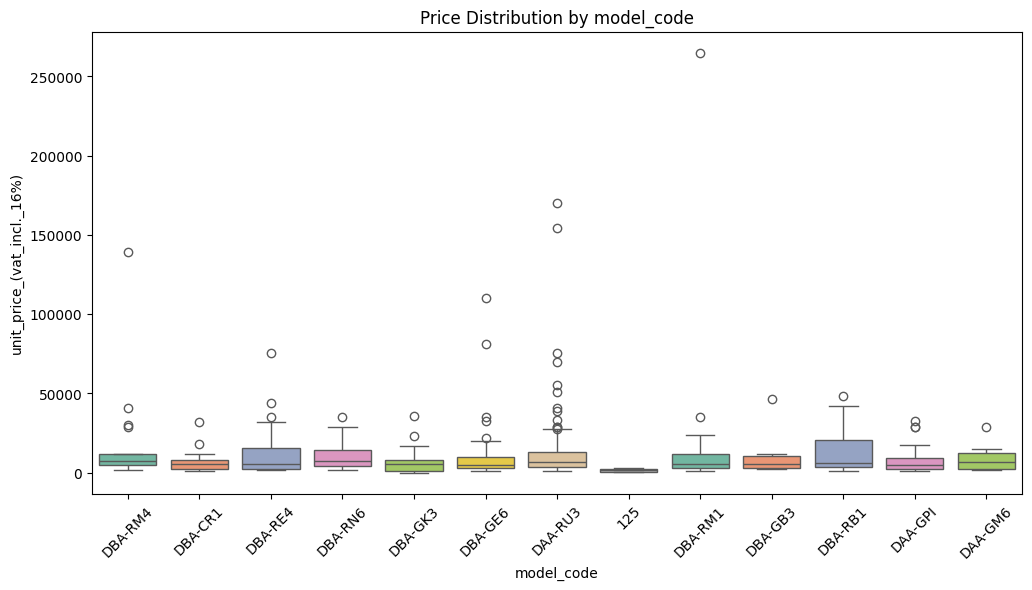

In [191]:
# Plotting the price distribution by model_code, using a boxplot to visualize the spread and outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_df, x='model_code', y='unit_price_(vat_incl._16%)', palette='Set2')
plt.xticks(rotation=45)
plt.title('Price Distribution by model_code')
plt.show()


In [192]:
clean_df

,assessment_id,vehicle_model,model_code,category,part_or_service,pervice_provider_id,part_condition,part_type,quantity,fix_type,damage,estimated_repair_days,for_painting,paint_type,panels_to_paint,unit_price_(vat_incl._16%),date
0,56,CR-V,DBA-RM4,Body,Boot Catch Panel,44.0,-,-,1,replace,Scratched,4,no,-,NaN,NaN,2023-10-23 08:36:00
1,56,CR-V,DBA-RM4,Body,LHR Wheel Arch Moulding,44.0,used,Dealer/OEM,1,repair,Broken,4,no,-,NaN,9280.0,2023-10-23 08:36:00
2,56,CR-V,DBA-RM4,Body,LHS Rear Wing,44.0,-,-,1,replace,Scratched,4,yes,Metallic,4.0,NaN,2023-10-23 08:36:00
3,56,CR-V,DBA-RM4,Body,Tailgate Assembly,81.0,used,Dealer/OEM,1,repair,Buckled,4,yes,Metallic,4.0,139200.0,2023-10-23 08:36:00
4,56,CR-V,DBA-RM4,Body,Tailgate Shocks,44.0,used,Dealer/OEM,1,repair,Bent,4,no,-,NaN,5800.0,2023-10-23 08:36:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,635,Stream,DBA-RN6,Services,Painting Per Panel,56.0,-,-,1,-,-,3,no,-,NaN,6000.0,2025-05-05 12:49:00
431,635,Stream,DBA-RN6,Services,Gas Welding,56.0,-,-,1,-,-,3,no,-,NaN,4000.0,2025-05-05 12:49:00
432,635,Stream,DBA-RN6,Services,2k Primer,56.0,-,-,1,-,-,3,no,-,NaN,2000.0,2025-05-05 12:49:00
433,635,Stream,DBA-RN6,Services,Miscellaneous,56.0,-,-,1,-,-,3,no,-,NaN,1500.0,2025-05-05 12:49:00


In [193]:
clean_df.dtypes

assessment_id                          int64
vehicle_model                         object
model_code                            object
category                              object
part_or_service                       object
pervice_provider_id           string[python]
part_condition                        object
part_type                             object
quantity                               int64
fix_type                              object
damage                                object
estimated_repair_days                  int64
for_painting                          object
paint_type                            object
panels_to_paint                      float64
unit_price_(vat_incl._16%)           float64
date                          datetime64[ns]
dtype: object

- Using median to impute the missing values in the **'unit_price_(vat_incl._16%)'** due to the presence of outliers in each  model code category

In [194]:
# Step 1: Get median price per model_code
model_code_medians = clean_df.groupby('model_code')['unit_price_(vat_incl._16%)'].median().sort_values(ascending=False)
print(model_code_medians)


model_code
DBA-RN6    7500.0
DBA-RM4    7020.0
DAA-GM6    6500.0
DAA-RU3    6380.0
DBA-RB1    6000.0
DBA-CR1    5500.0
DBA-GB3    5500.0
DBA-GK3    5500.0
DBA-RE4    5500.0
DBA-RM1    5500.0
DAA-GPI    5000.0
DBA-GE6    4750.0
125        1740.0
Name: unit_price_(vat_incl._16%), dtype: float64


In [195]:
# Step 2: Replace missing values with the group median
clean_df['unit_price_(vat_incl._16%)'] = clean_df.apply(
    lambda row: model_code_medians[row['model_code']] if pd.isna(row['unit_price_(vat_incl._16%)']) else row['unit_price_(vat_incl._16%)'],
    axis=1
)


In [196]:
clean_df.isnull().sum()

assessment_id                   0
vehicle_model                   0
model_code                      0
category                        0
part_or_service                 0
pervice_provider_id            10
part_condition                  0
part_type                       0
quantity                        0
fix_type                        0
damage                          0
estimated_repair_days           0
for_painting                    0
paint_type                      0
panels_to_paint               315
unit_price_(vat_incl._16%)      0
date                            0
dtype: int64

In [197]:
#renaming the colum pervice_provider_id to service_provider_id
clean_df.rename(columns={'pervice_provider_id': 'service_provider_id'}, inplace=True)

In [198]:
clean_df['service_provider_id'].unique()

<StringArray>
[ '44.0',  '81.0',  '29.0',  '37.0', '214.0', '213.0', '224.0', '259.0',
    <NA>, '100.0',  '55.0',  '56.0',  '47.0',  '52.0', '105.0', '223.0',
 '222.0',  '32.0']
Length: 18, dtype: string

- Replacing the missing values in the service provider by the mode of each category

In [199]:
#displaying thr rows with missing service_provider_id
missing_service_provider = clean_df[clean_df['service_provider_id'].isnull()]
missing_service_provider

,assessment_id,vehicle_model,model_code,category,part_or_service,service_provider_id,part_condition,part_type,quantity,fix_type,damage,estimated_repair_days,for_painting,paint_type,panels_to_paint,unit_price_(vat_incl._16%),date
79,204,Fit,DBA-GE6,Body,Rear Bumper,<NA>,-,-,1,replace,Dented,10,yes,Ordinary,9.0,4750.0,2024-02-26 07:46:00
80,204,Fit,DBA-GE6,Body,RHS Running Board,<NA>,-,-,1,replace,Dented,10,yes,Ordinary,9.0,4750.0,2024-02-26 07:46:00
82,204,Fit,DBA-GE6,Body,LHS Front Door,<NA>,-,-,1,replace,Scratched,10,yes,Ordinary,9.0,4750.0,2024-02-26 07:46:00
83,204,Fit,DBA-GE6,Services,Labour Charges,<NA>,-,-,1,-,-,10,no,-,NaN,20000.0,2024-02-26 07:46:00
84,204,Fit,DBA-GE6,Services,Painting Per Panel,<NA>,-,-,1,-,-,10,no,-,NaN,5500.0,2024-02-26 07:46:00
85,204,Fit,DBA-GE6,Services,Miscellaneous,<NA>,-,-,1,-,-,10,no,-,NaN,3000.0,2024-02-26 07:46:00
86,204,Fit,DBA-GE6,Services,2k Primer,<NA>,-,-,1,-,-,10,no,-,NaN,2000.0,2024-02-26 07:46:00
87,204,Fit,DBA-GE6,Services,Gas Welding,<NA>,-,-,1,-,-,10,no,-,NaN,3500.0,2024-02-26 07:46:00
88,204,Fit,DBA-GE6,Services,A/C Gas,<NA>,-,-,1,-,-,10,no,-,NaN,4500.0,2024-02-26 07:46:00
139,222,Ace,125,Services,Labour Charges,<NA>,-,-,1,-,-,3,no,-,NaN,3000.0,2024-03-07 08:26:00


In [200]:
#replacing the missing values in the service provider by the mode of each category
clean_df['service_provider_id'] = clean_df.groupby('model_code')['service_provider_id'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
clean_df['service_provider_id'].isnull().sum()

0

In [201]:
clean_df.isnull().sum()

assessment_id                   0
vehicle_model                   0
model_code                      0
category                        0
part_or_service                 0
service_provider_id             0
part_condition                  0
part_type                       0
quantity                        0
fix_type                        0
damage                          0
estimated_repair_days           0
for_painting                    0
paint_type                      0
panels_to_paint               315
unit_price_(vat_incl._16%)      0
date                            0
dtype: int64

### Data Set is clean and ready for analysis

Question 1
- Compare the average total repair cost between different vehicle model
codes. Is there a relationship between the repair costs and the services
offered?


In [202]:
clean_df['repair_cost'] = clean_df['unit_price_(vat_incl._16%)'] * clean_df['quantity']

In [203]:
#get the average price of each model_code
repair_cost_by_model_code = clean_df.groupby('model_code')['repair_cost'].mean().sort_values(ascending=False)
print(repair_cost_by_model_code)

model_code
DBA-RM4    16244.545455
DBA-RB1    15358.428571
DAA-RU3    14645.126000
DBA-RM1    13741.363636
DBA-GB3    11414.285714
DBA-RE4    10391.904762
DBA-RN6    10037.106383
DBA-GE6     8983.882353
DAA-GPI     8327.619048
DAA-GM6     7990.571429
DBA-GK3     7403.000000
DBA-CR1     6956.521739
125         1517.090909
Name: repair_cost, dtype: float64


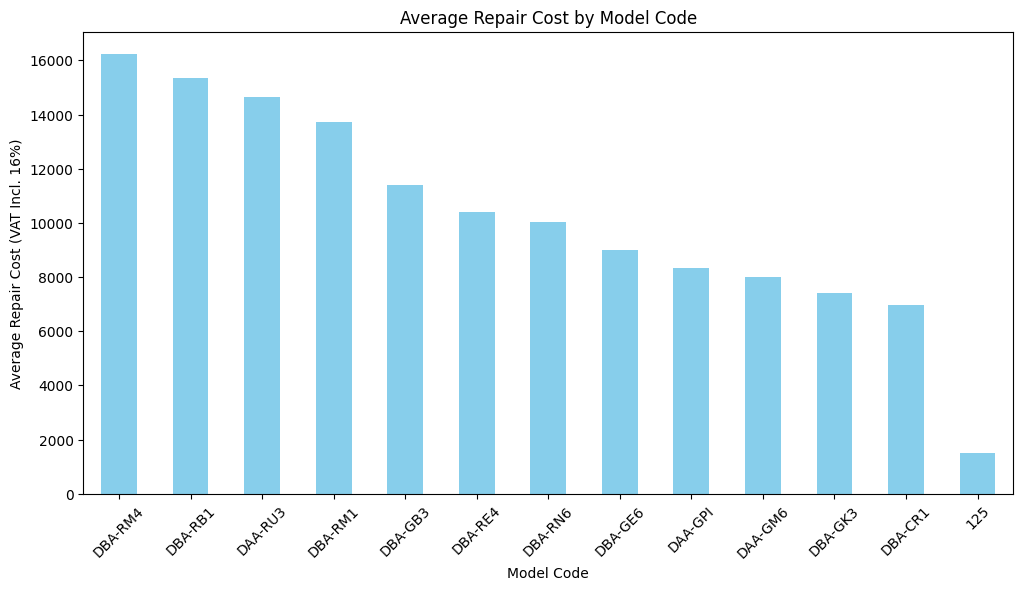

In [204]:
#create a bar plot to visualize the average repair cost by model_code
plt.figure(figsize=(12, 6))
repair_cost_by_model_code.plot(kind='bar', color='skyblue')
plt.title('Average Repair Cost by Model Code')
plt.xlabel('Model Code')    
plt.ylabel('Average Repair Cost (VAT Incl. 16%)')
plt.xticks(rotation=45)
plt.show()

**Interpretation**

There is a clear variation in average repair costs across vehicle models, with DBA-RM4, DBA-RB1, and DAA-RU3 being the most expensive to repair—likely due to costlier parts, higher quantities, or more complex services while 125 and DBA-CR1 have the lowest average repair costs

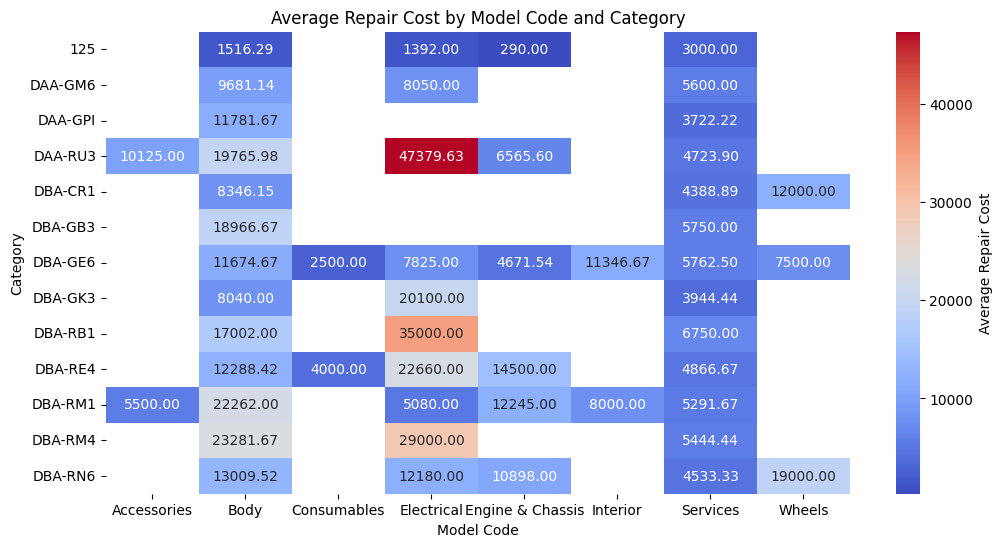

In [205]:
# Average repair cost by model_code and category
pivot_table = clean_df.pivot_table(values='repair_cost', index='model_code', columns='category', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Average Repair Cost'})
plt.title('Average Repair Cost by Model Code and Category')
plt.xlabel('Model Code')
plt.ylabel('Category')
plt.show()


The heatmap reveals that electrical and body repairs contribute significantly to high repair costs across most vehicle model codes. In contrast, consumables and accessories consistently incur the lowest costs, suggesting they have a minimal impact on total repair expenses

**Question 2**
- Analyze the relationship between damage types and fix_type (repair vs.
replace). Which damage types are more likely to lead to part replacement
instead of repair?


In [206]:
clean_df.columns

Index(['assessment_id', 'vehicle_model', 'model_code', 'category',
       'part_or_service', 'service_provider_id', 'part_condition', 'part_type',
       'quantity', 'fix_type', 'damage', 'estimated_repair_days',
       'for_painting', 'paint_type', 'panels_to_paint',
       'unit_price_(vat_incl._16%)', 'date', 'repair_cost'],
      dtype='object')

In [207]:
pd.crosstab(clean_df['damage'], clean_df['fix_type'])

fix_type,-,repair,replace
damage,,,
-,141,0,0
Bent,0,36,0
Broken,0,54,0
Buckled,0,6,0
Cracked,0,6,1
Crushed,0,18,0
Dented,0,15,37
Deployed,0,7,0
Leaking,0,9,1


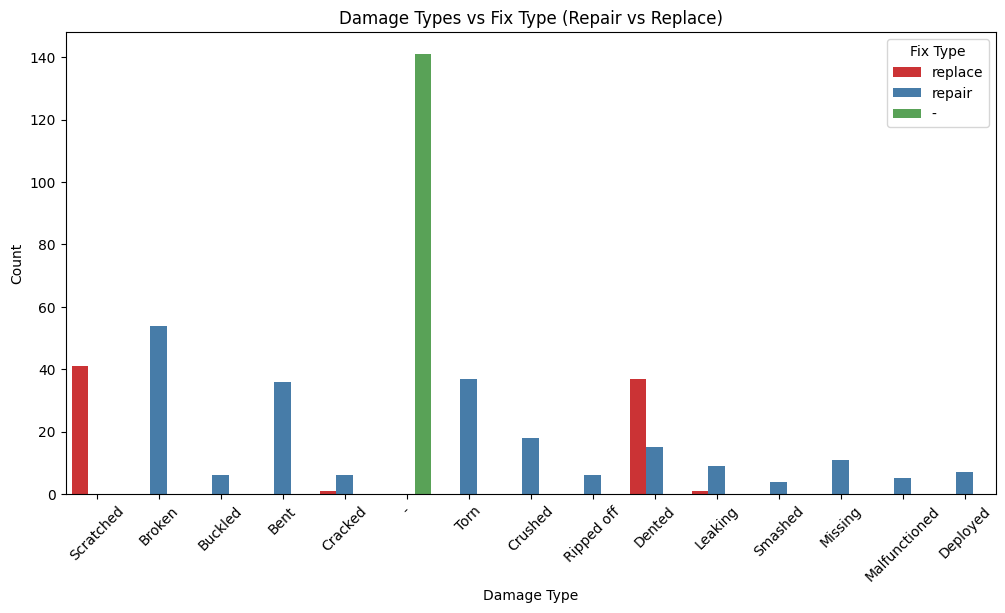

In [208]:
pd.crosstab(clean_df['damage'], clean_df['fix_type'])
# Create a bar plot to visualize the relationship between damage types and fix_type
plt.figure(figsize=(12, 6))
sns.countplot(data=clean_df, x='damage', hue='fix_type', palette='Set1')
plt.title('Damage Types vs Fix Type (Repair vs Replace)')
plt.xlabel('Damage Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fix Type')
plt.show()

- Severe or structural damage often leads to replacement with scratched having 100% replacement may be replaced more than expected, perhaps due to cost or policy preferences

- Minor, cosmetic, or surface damage typically results in repairs.

- Data quality (e.g.the green bar which indicates records for which the damage type was not provided) can mask true trends.



**Question 3**
- Evaluate the interaction between fix_type, parts, total repair cost,
and services rendered


fix_type
repair     17019.088224
replace     5648.875000
-           4901.339220
Name: repair_cost, dtype: float64


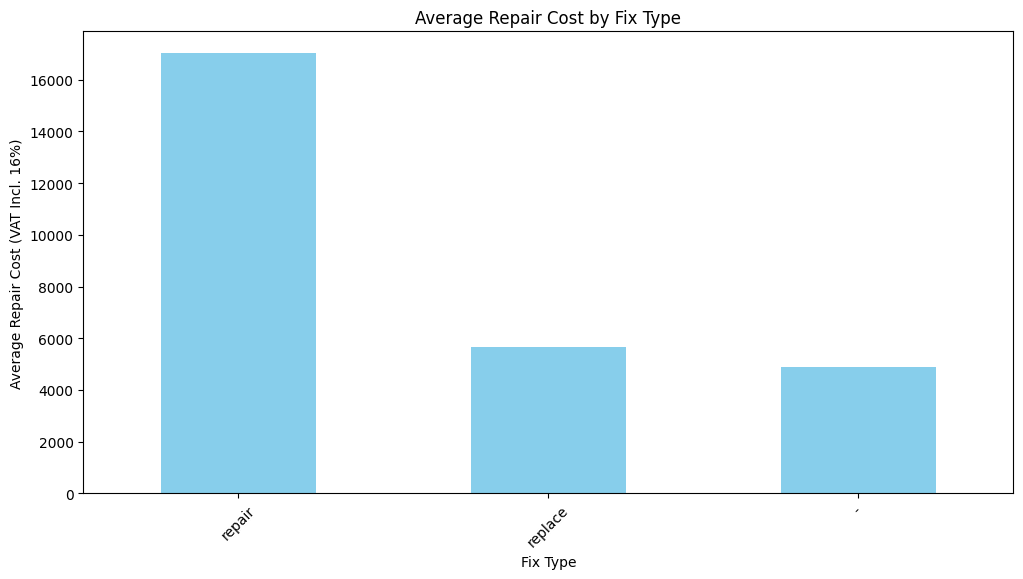

In [209]:
#checking repair cost by fix type
repair_cost_by_fix_type = clean_df.groupby('fix_type')['repair_cost'].mean().sort_values(ascending=False)
print(repair_cost_by_fix_type)
# Create a bar plot to visualize the average repair cost by fix type
plt.figure(figsize=(12, 6)) 
repair_cost_by_fix_type.plot(kind='bar', color='skyblue')
plt.title('Average Repair Cost by Fix Type')
plt.xlabel('Fix Type')
plt.ylabel('Average Repair Cost (VAT Incl. 16%)')   
plt.xticks(rotation=45)
plt.show()

There are many more repair entries, so the average might be inflated due to a few very expensive repairs.

We don't yet know if each individual repair is truly more expensive than each replacement.

In [210]:
clean_df.groupby('fix_type')['repair_cost'].median()


fix_type
-          4000.0
repair     8000.0
replace    5500.0
Name: repair_cost, dtype: float64

Seeing that the median also follows the same trend for the fix_type, we can conclude that repairs are generally more expensive than replacements

Text(0.5, 1.0, 'Categories by Fix Type')

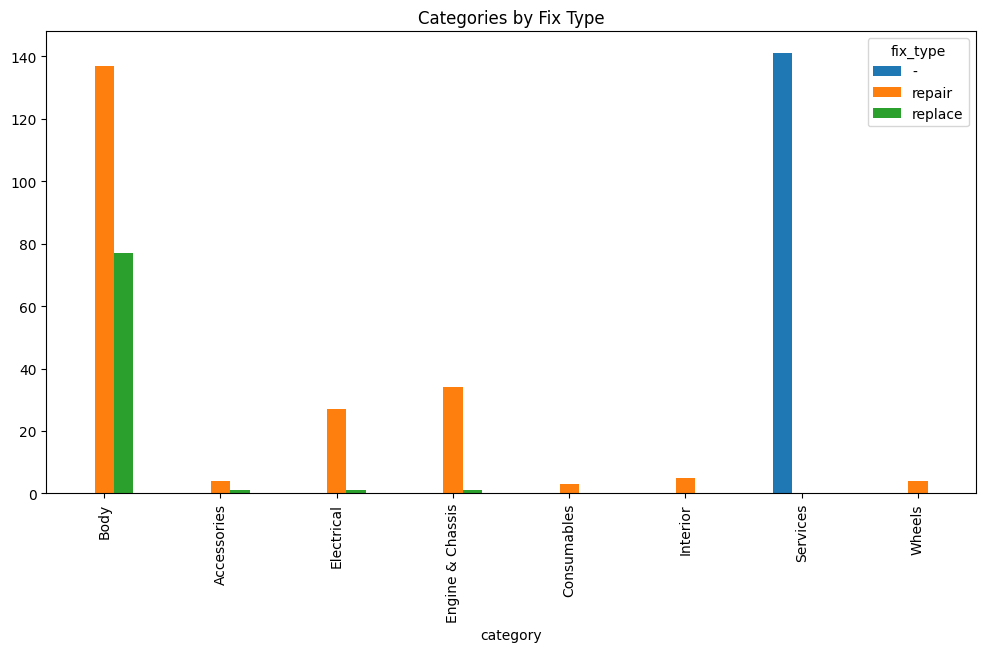

In [211]:
categories_fix_type = clean_df.groupby(['category', 'fix_type']).size().unstack().fillna(0)
categories_fix_type.sort_values('replace', ascending=False).plot(kind='bar', figsize=(12,6))
plt.title('Categories by Fix Type')



For all  the different service/part categories, repair (orange bars) significantly outnumber replacement (green bars).


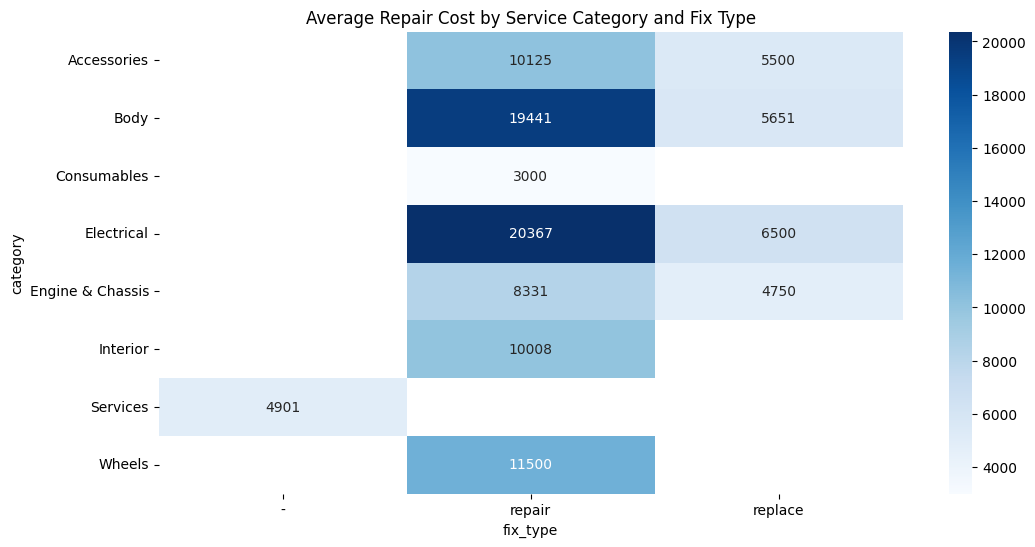

In [212]:
pivot2 = clean_df.pivot_table(index='category', columns='fix_type', values='repair_cost', aggfunc='mean')

plt.figure(figsize=(12,6))
sns.heatmap(pivot2, annot=True, fmt=".0f", cmap='Blues')
plt.title('Average Repair Cost by Service Category and Fix Type')
plt.show()

In [213]:
print(pivot2.sort_values('repair', ascending=False))

fix_type                   -        repair      replace
category                                               
Electrical               NaN  20366.732593  6500.000000
Body                     NaN  19440.737956  5651.428571
Wheels                   NaN  11500.000000          NaN
Accessories              NaN  10125.000000  5500.000000
Interior                 NaN  10008.000000          NaN
Engine & Chassis         NaN   8331.235294  4750.000000
Consumables              NaN   3000.000000          NaN
Services          4901.33922           NaN          NaN


Repairs are consistently more expensive than replacements within the same category with the electrical category been the most expensive and onsumables the least expensive

## General Conclusions
- Repair costs vary by model — Models like DBA-RM4 and DAA-RU3 are the most expensive to repair.

- Repairs are costlier than replacements — Especially in electrical and body service categories.

- Service category matters — Electrical and bodywork drive high repair costs; consumables and accessories are the cheapest.

- Some parts are mostly repaired, not replaced — e.g., interior, consumables.

## General recommendations
- Consider replacing over repairing for high-cost services to save time and labor.

- Improve diagnostics to avoid unnecessary, expensive repairs.

- Develop cost guidelines for high-cost models to standardize decisions.

- Fix missing fix_type entries to enhance future data analysis.